<a href="https://colab.research.google.com/github/teonakuzmanovska/Data-Science/blob/master/kaggle_datasets/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boston housing dataset
The dataset can be downloaded [here](https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data)

- Target column 1: MEDV (price)
- Target column 2: NOX (oxide level)

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/HousingData.csv')

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Checking for null values

In [7]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### Exploring the data

The purpose of this is to find out the distributions of the missing values, so that we can choose the best way to handle them.

- Normal distribution -> mean (MCAR)
- Skewed distribution -> median (MCAR)
- Random -> KNN (MCAR) or MICE (MCAR, MAR, MNAR)

array([[<Axes: title={'center': 'LSTAT'}>]], dtype=object)

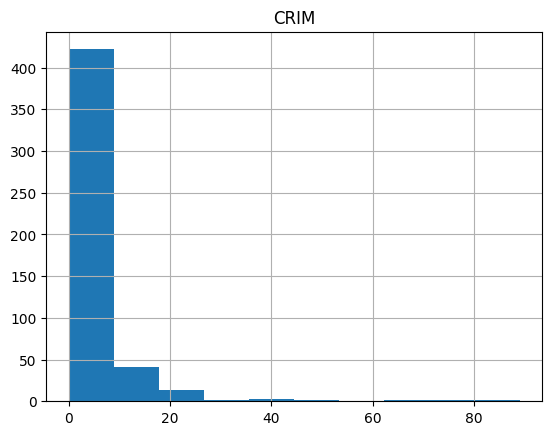

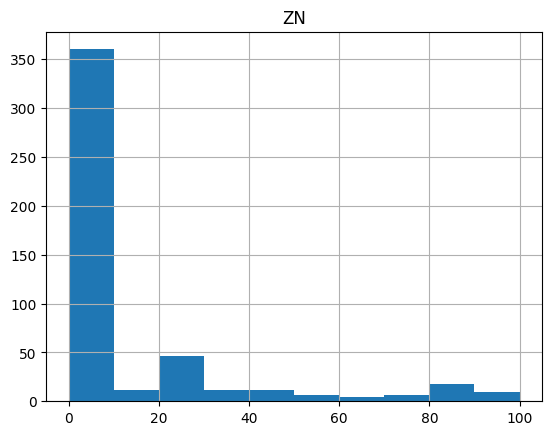

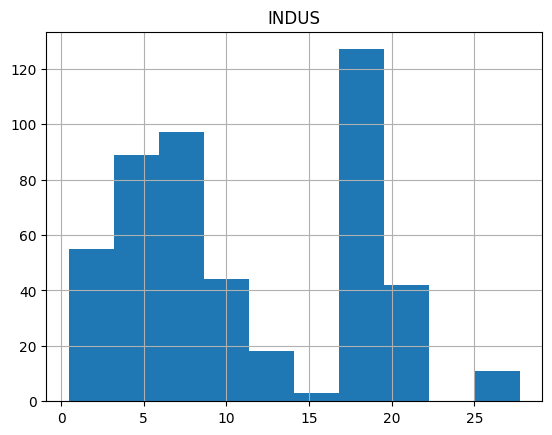

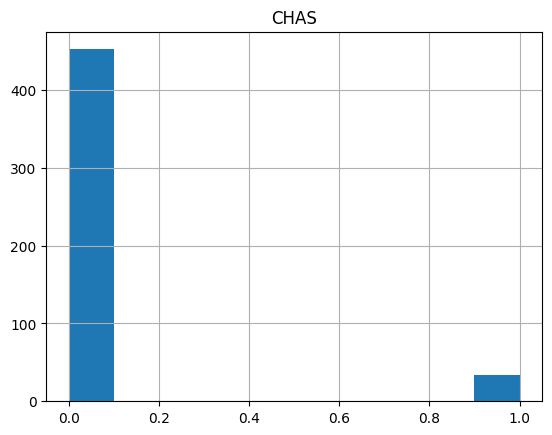

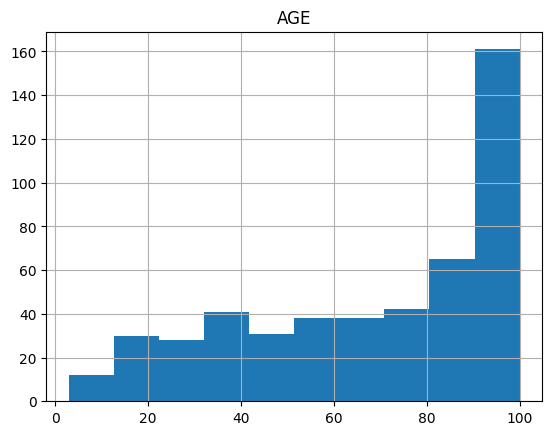

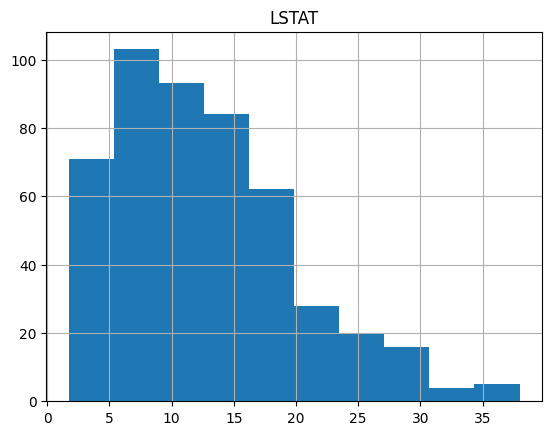

In [8]:
df.hist('CRIM')
df.hist('ZN')
df.hist('INDUS')
df.hist('CHAS')
df.hist('AGE')
df.hist('LSTAT')

From the observation we can conclude that none of the columns with missing values have normal distribution, so we won't be using mean for any of them.

- CRIM, ZN, INDUS have non-continuous distribution, although if we handle the outliers, CRIM and ZN would have continuous skewed distribution.

- We are not handling the outliers for now, so we will tread them as non-continuous distributions.

-> We will handle the missing values for this columns with KNN.

- From observing the histogram of CHAS we can notice that it has either 0.0 or 1.0 as values. That is similar to category or binary values, so we can handle the missing values either with imputing the most frequent value. However, although the complexity of this solution is low, this will not be very accurate.

-> For that purpose we have chosen to use KNN for most accurate results and then rounding the predicted values.

Note: We can choose between KNN and MICE, following is an explanation of this choice

In [9]:
import missingno as msno

### Handling missing values

From the matrix we can see that the lines are random, not strictly connected, so we can conclude that the values are missing at random.

<Axes: >

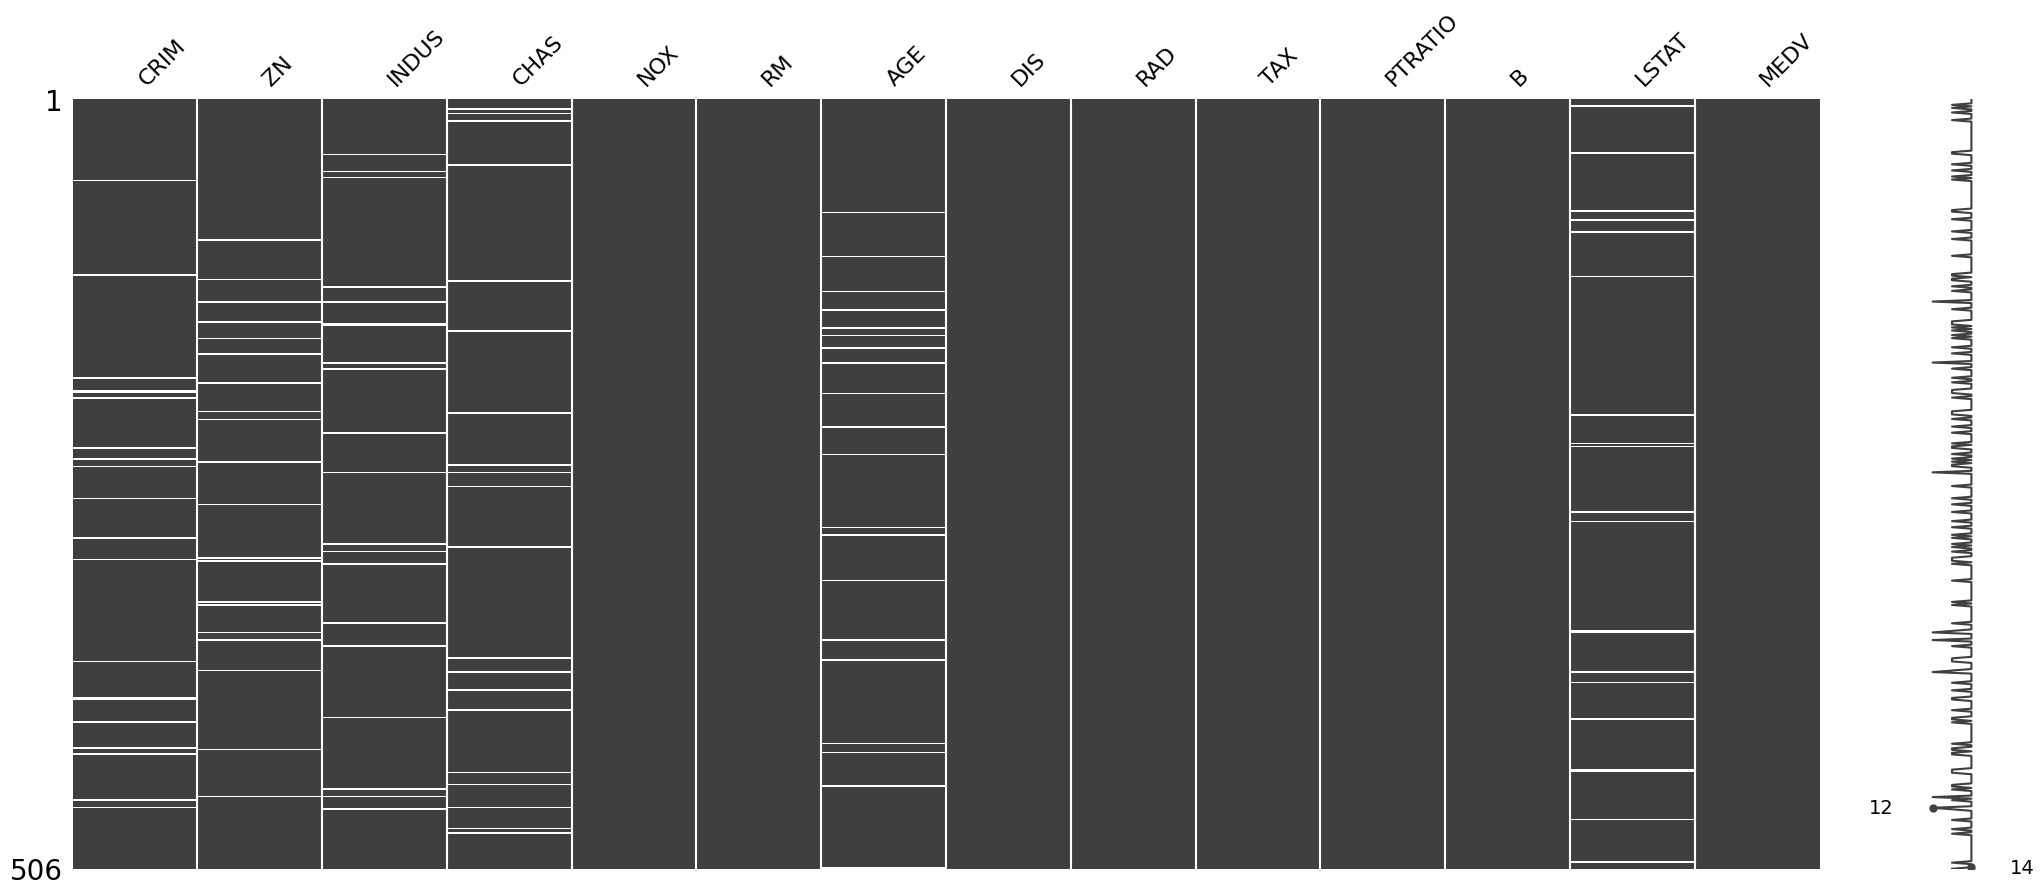

In [10]:
msno.matrix(df)

From the heatmap we can conclude that the values are missing completely at random (MCAR), so we can handle the values using KNN. If they were not missing at random, we would have used MICE.

- light, < 0.5 missing at random
- dark, > 0.5 not missing at random

<Axes: >

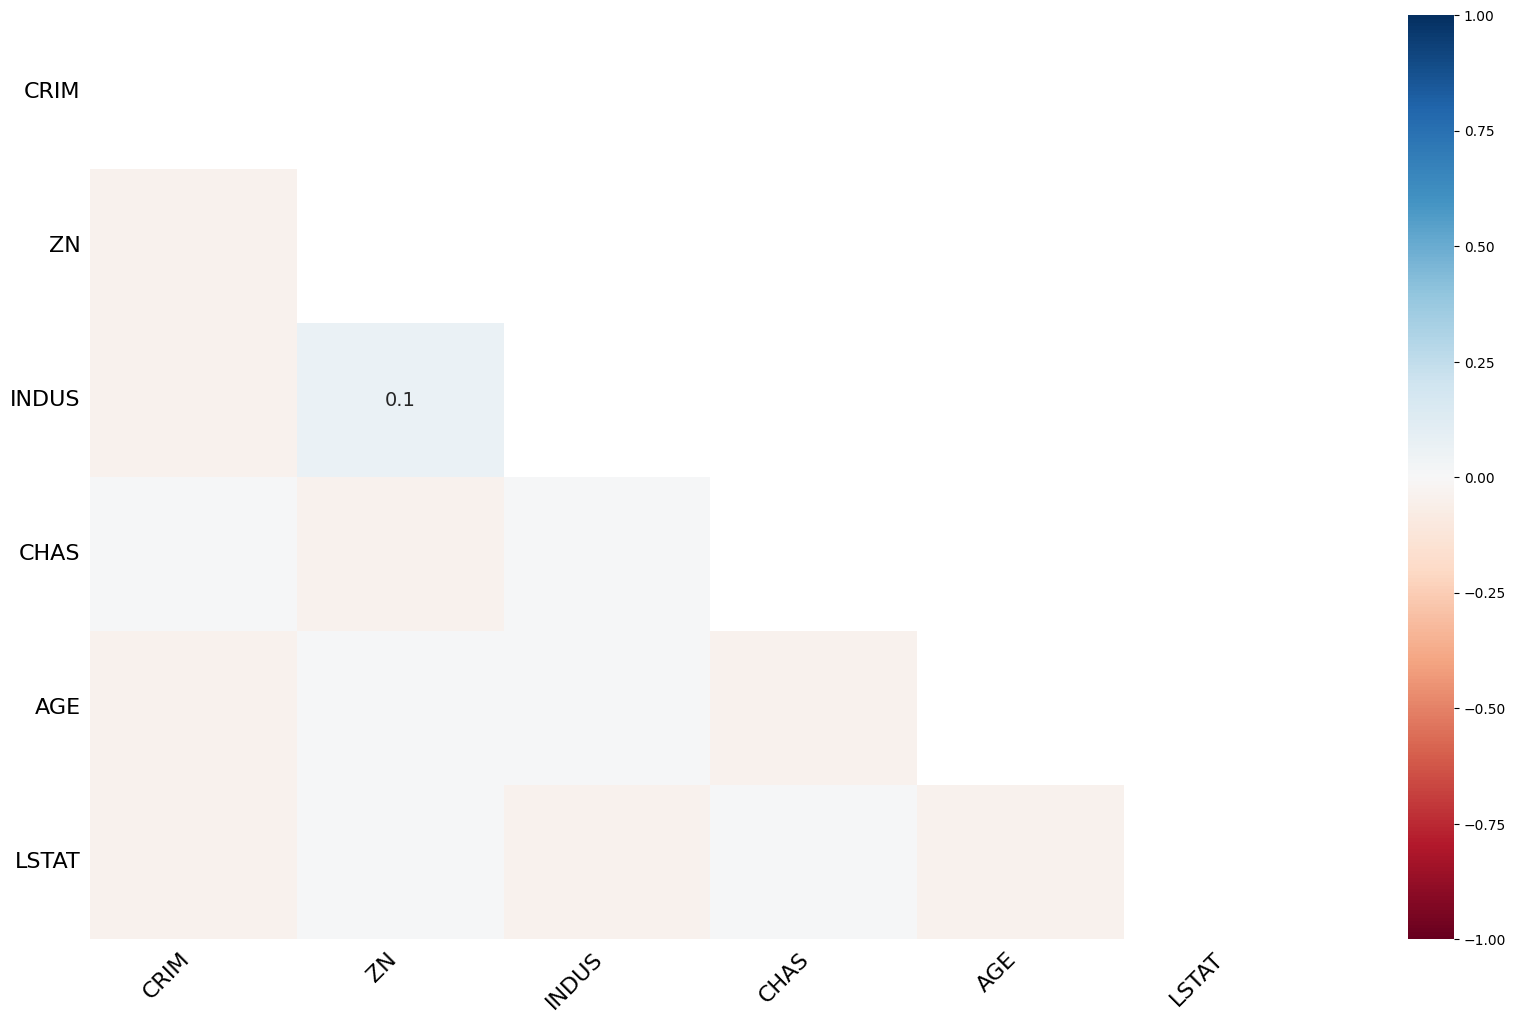

In [11]:
msno.heatmap(df)

<Axes: >

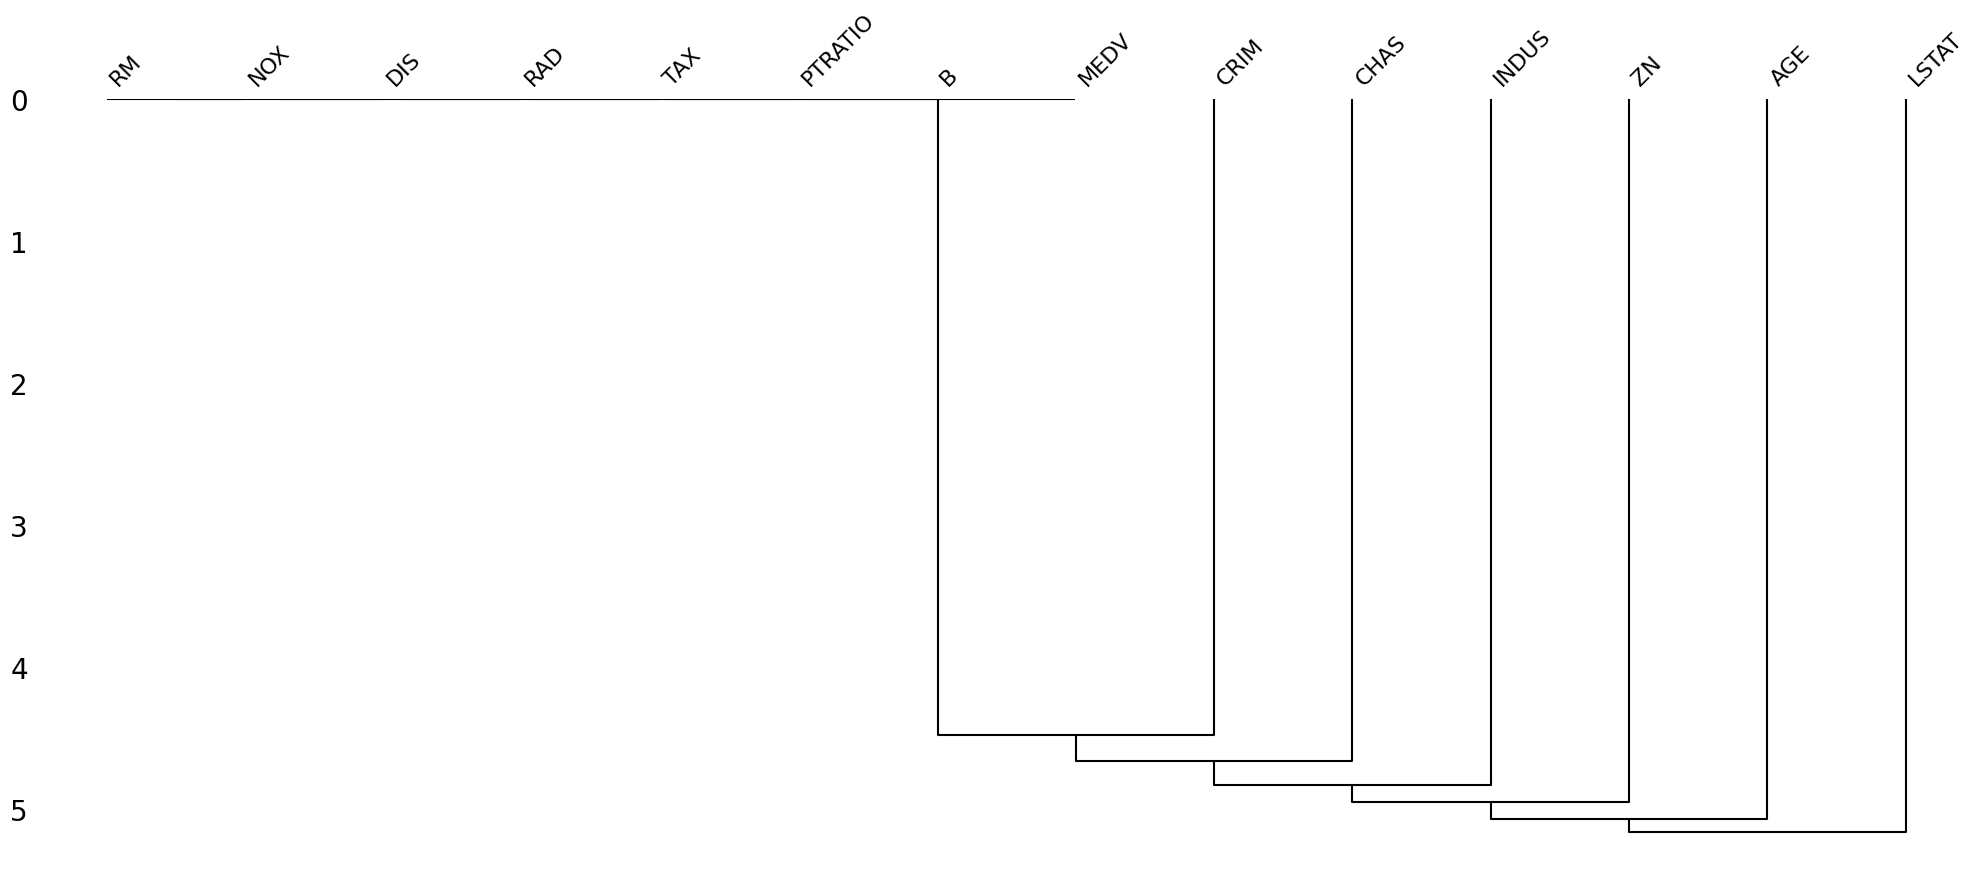

In [12]:
msno.dendrogram(df)

In [13]:
from sklearn.impute import KNNImputer

In [14]:
knn_imputer = KNNImputer(n_neighbors=2)

In [15]:
df['CRIM'] = knn_imputer.fit_transform(df['CRIM'].to_numpy().reshape(-1, 1))

In [16]:
df['ZN'] = knn_imputer.fit_transform(df['ZN'].to_numpy().reshape(-1, 1))

In [17]:
df['INDUS'] = knn_imputer.fit_transform(df['INDUS'].to_numpy().reshape(-1, 1))

In [18]:
df['CHAS'] = knn_imputer.fit_transform(df['CHAS'].to_numpy().reshape(-1, 1))

In [19]:
df['CHAS'] = df['CHAS'].round()

<Axes: >

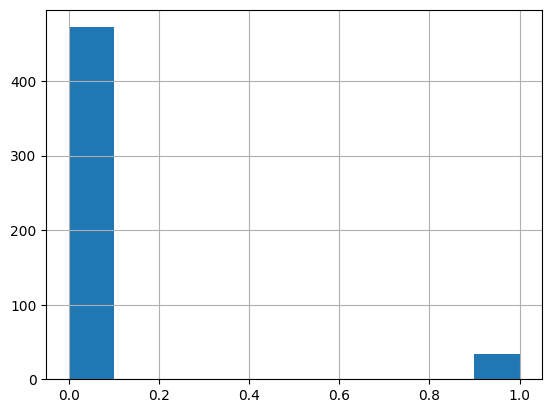

In [20]:
df.CHAS.hist()

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
simple_imputer = SimpleImputer(strategy='median')

In [23]:
df['AGE'] = simple_imputer.fit_transform(df['AGE'].to_numpy().reshape(-1, 1))

In [24]:
df['LSTAT'] = simple_imputer.fit_transform(df['LSTAT'].to_numpy().reshape(-1, 1))

In [25]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

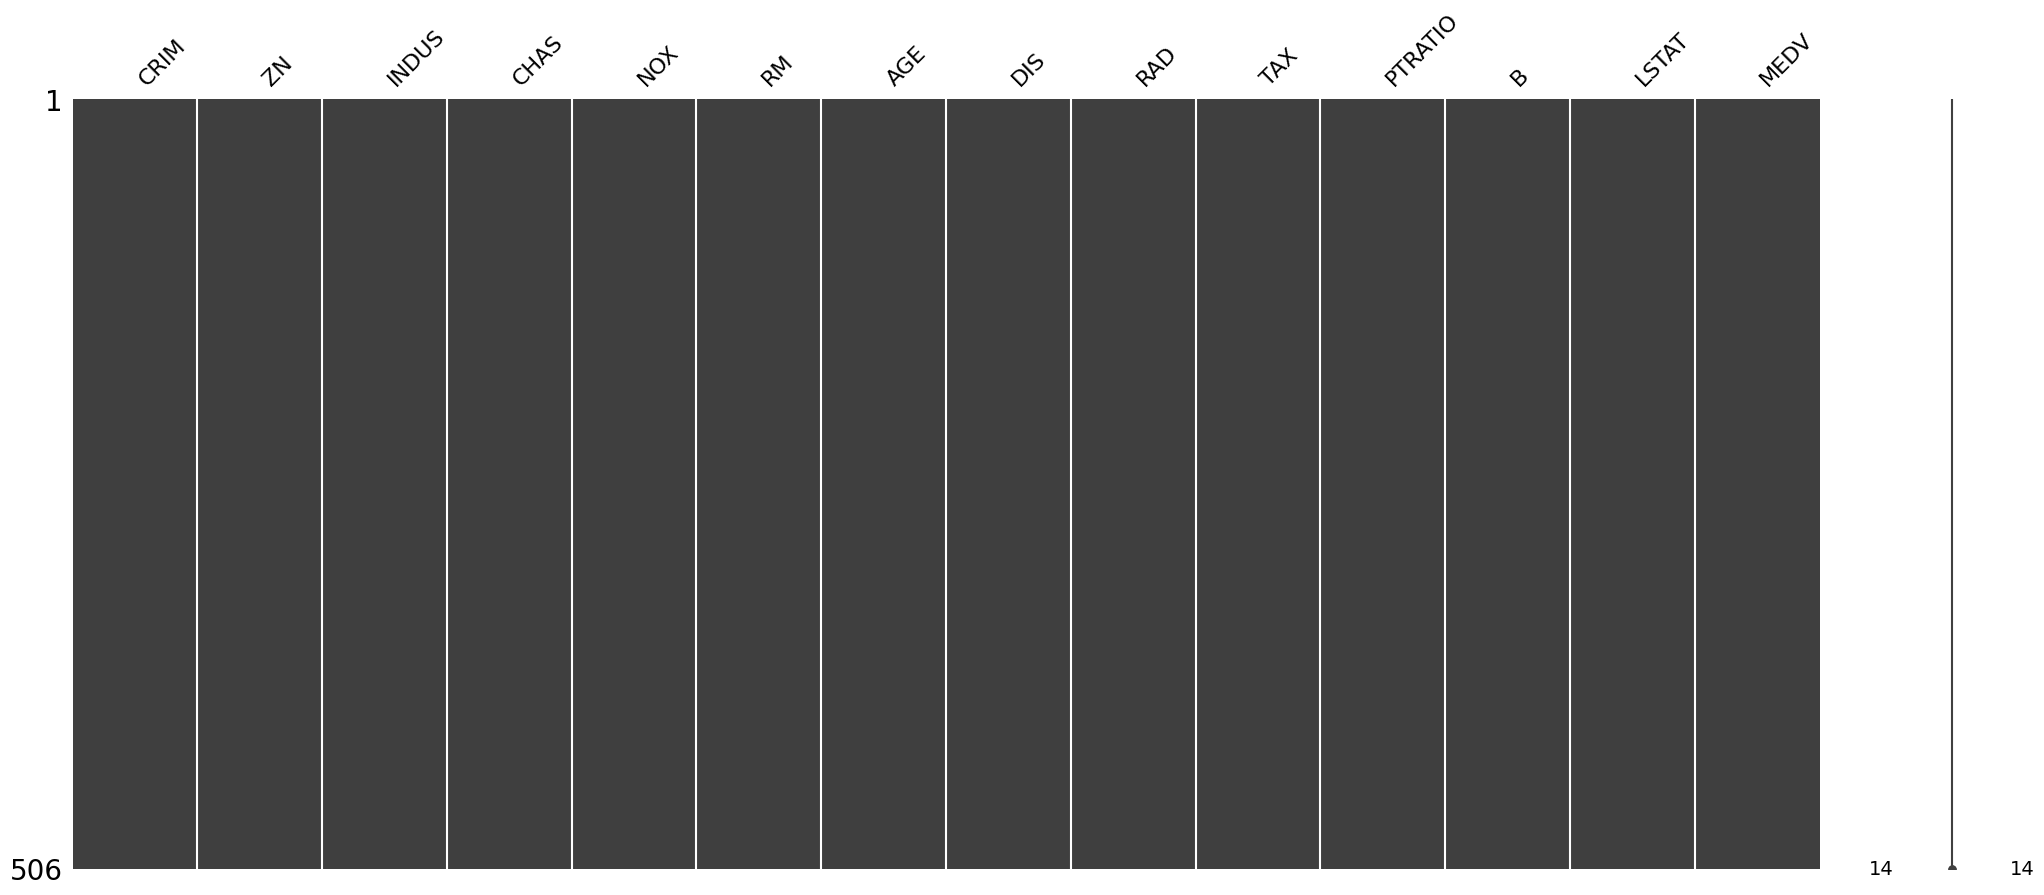

In [26]:
msno.matrix(df)

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

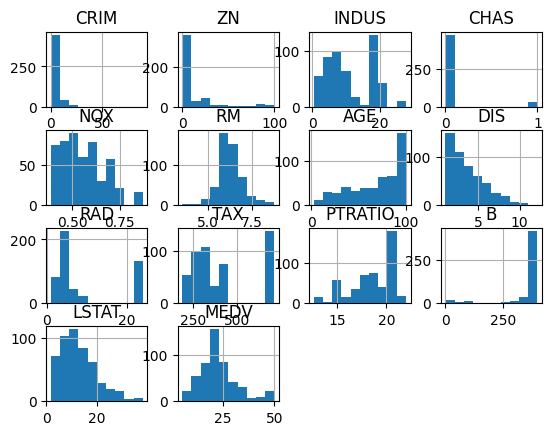

In [27]:
df.hist()

### Creating train and test sets

After successfully handling the values, we are going to create our training and testing sets.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [30]:
X = df.drop('MEDV', axis=1)

In [31]:
df.drop('MEDV', axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [32]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [33]:
y = df['MEDV']

In [34]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [35]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scaling - normalizing the values

We are scaling the values before training the model.
This should be done before creating the training and testing sets to prevent data leakage into the training model.

We have chosen MinMax scaler before Simple scaler because the distributions are not normal. If the distributions were normal, we would have used Simple scaler.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
# y_train = MinMaxScaler().fit_transform(y_train.to_numpy().reshape(-1, 1))
# y_test = MinMaxScaler().fit_transform(y_test.to_numpy().reshape(-1, 1))

### Training the model

At last, we are training our model.
We have chosen Linear Regression because the target column is filled with constant values.

If the target column was filled with categories, we would have used KNN.

If it was filled with binary values (True/False or 0/1), we would have used Logistic Regression.

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
linear_regression_model = LinearRegression().fit(X_train, y_train)

In [41]:
y_pred = linear_regression_model.predict(X_test)

### Evaluating the model

Using r2_score and score metrics, we are evaluating the performance of the model

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test,y_pred)

0.5748994363168587

In [44]:
df.CHAS.value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

In [45]:
linear_regression_model.score(X_train,y_train)

0.759090796523706